In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import re

import spacy
from pymystem3 import Mystem
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import time

In [2]:
arr = os.listdir('./input/')
arr_df = pd.DataFrame(arr, columns = ['file_name'])
arr_df

,file_name
0,14773455.jl
1,file_7321705_455951711_124.jl
2,file_11834040_455951711_112.jl
3,w2.jl
4,file_10094987_455951711_145.jl
5,w3.jl
6,17597852.jl
7,5044562.jl
8,file_6170053_455951711_115.jl
9,file_9434638_455951711_142.jl


In [105]:
file_index = 11
path = f'./input/{arr_df["file_name"][file_index]}'

In [106]:
columns = ['comment', 'date_time', 'color','size', 'thumb_up', 'thumb_down', 'prod_eval', 'prod', 'brand']

df = pd.read_json(path).transpose().reset_index().drop('index', axis=1)
df = df.set_axis(columns, axis = 'columns')

df.head(5)

,comment,date_time,color,size,thumb_up,thumb_down,prod_eval,prod,brand
0,"Наушники суперские, качество звука суперское, ...",2021-05-04T14:37:48Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple
1,Через год перестал работать правый микрофон и ...,2021-05-04T05:57:33Z,белый,0,1,0,2,Наушники Airpods (2-го поколения) с зарядным ф...,Apple
2,Одним словом: качество! Оригинальные,2021-05-03T10:39:27Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple
3,пишу отзыв спустя 9 месяцев. Наушники работают...,2021-05-03T03:54:20Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple
4,"Отлично, купила вторые для дочери.",2021-05-02T18:38:42Z,белый,0,2,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple


# Функции: Clean_text, Stopwords_del

In [107]:
def delete_non_letters(words):
    new_words = []
    words = words.split()
    
    for word in words:
        new_word = "".join(c if c.isalpha() else " " for c in word )
        
        if new_word != '':
            new_words.append(new_word)
    text = ' '.join(c for c in new_words)
        
    return text

In [108]:
### Text Normalizing function. Part of the following function was taken from this link. 
def clean_text(text):
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    #удаляет пунктуацию
    #translation_table = str.maketrans("", "", string.punctuation)
    #text = text.translate(translation_table)   
    
    text = text.lower()
    ## Clean the text
    text = re.sub(r"[,_»«\*!.\/'+-=)(]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\%", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"\|", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r'"', " ", text)
    text = re.sub(r'«', " ", text)
    text = re.sub(r'\*', " ", text)
    text = re.sub(r'\?', " ", text)
    text = re.sub(r'»', " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = emoji_pattern.sub(r'', text)
    #text = " ".join(text.split())
    
    text = delete_non_letters(text)
    
    return text


In [109]:
def delete_stopwords(text): 
    text = text.split()
    text = [w for w in text if not w in russian_stopwords and len(w) >= 3]
    text = " ".join(text)
    
    return text

In [110]:
df.head()

,comment,date_time,color,size,thumb_up,thumb_down,prod_eval,prod,brand
0,"Наушники суперские, качество звука суперское, ...",2021-05-04T14:37:48Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple
1,Через год перестал работать правый микрофон и ...,2021-05-04T05:57:33Z,белый,0,1,0,2,Наушники Airpods (2-го поколения) с зарядным ф...,Apple
2,Одним словом: качество! Оригинальные,2021-05-03T10:39:27Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple
3,пишу отзыв спустя 9 месяцев. Наушники работают...,2021-05-03T03:54:20Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple
4,"Отлично, купила вторые для дочери.",2021-05-02T18:38:42Z,белый,0,2,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple


# Stopwords extension

In [111]:
file_name = 'StopWords_extension.csv'
path = f'./{file_name}'
SW = pd.read_csv(path, index_col = 'Index')
SW_list = SW['Word'].tolist()

In [112]:
prod_text = clean_text(df['prod'][0])
brand_text = clean_text(df['brand'][0])

In [113]:
stopwords_add_by_hand = ['брать','понравиться','качество','удобный','покупка', 'купить', 'цена','пломба','классный','доставка','очень','довольный', 'быстрый','быстро', 'хороший','отлично','все','прийти', 'класс','отличный', 'свой', 'отзыв', 'приходить', 'супер','это', 'спасибо', 'работа']
stopwords_add_by_category = [i for i in brand_text.split()]+[i for i in prod_text.split()]
stopwords_add_by_category

['apple',
 'наушники',
 'airpods',
 'го',
 'поколения',
 'с',
 'зарядным',
 'футляром']

In [114]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(stopwords_add_by_hand+stopwords_add_by_category+SW_list)

# Clean comments before lemmatization

In [115]:
%time
df['cleaned_comment'] = df['comment'].map(lambda x: clean_text(x))

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 47.2 µs


In [116]:
#df['lemma_comment'] = df['cleaned_comment'].map(lambda x: delete_stopwords(x))

In [117]:
df.head(5)

,comment,date_time,color,size,thumb_up,thumb_down,prod_eval,prod,brand,cleaned_comment
0,"Наушники суперские, качество звука суперское, ...",2021-05-04T14:37:48Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,наушники суперские качество звука суперское ба...
1,Через год перестал работать правый микрофон и ...,2021-05-04T05:57:33Z,белый,0,1,0,2,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,через год перестал работать правый микрофон и ...
2,Одним словом: качество! Оригинальные,2021-05-03T10:39:27Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,одним словом качество оригинальные
3,пишу отзыв спустя 9 месяцев. Наушники работают...,2021-05-03T03:54:20Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,пишу отзыв спустя месяцев наушники работают от...
4,"Отлично, купила вторые для дочери.",2021-05-02T18:38:42Z,белый,0,2,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,отлично купила вторые для дочери


# Mystem lemmatization and drop empty comments

In [118]:
df.shape

(1534, 10)

In [119]:
df = df.drop(df[df['cleaned_comment']==''].index).reset_index(drop = True)

In [120]:
def lemmatize(text): 
    text =  [i for i in text]
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []
    count = 0
    lemma = m.lemmatize(merged_text)
    for t in lemma:
        
        if '|' not in t and count+1<len(lemma):
            doc.append(t)
            count+=1
          
        else:
            doc = ''.join(i for i in doc)
            res.append(doc)
            count+=1
            doc = []
    return res

In [121]:
%time
res = lemmatize(df['cleaned_comment'])

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.2 µs


In [122]:
df['lemma_comment'] = res

# Delete StopWords

In [123]:
%time
df['lemma_comment'] = df['lemma_comment'].map(lambda x: delete_stopwords(x))
df = df.drop(df[df['lemma_comment']==''].index)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


In [124]:
df.head(5)

,comment,date_time,color,size,thumb_up,thumb_down,prod_eval,prod,brand,cleaned_comment,lemma_comment
0,"Наушники суперские, качество звука суперское, ...",2021-05-04T14:37:48Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,наушники суперские качество звука суперское ба...,наушник суперский звук суперский бас качать ор...
1,Через год перестал работать правый микрофон и ...,2021-05-04T05:57:33Z,белый,0,1,0,2,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,через год перестал работать правый микрофон и ...,переставать правый микрофон отключаться левый ...
2,Одним словом: качество! Оригинальные,2021-05-03T10:39:27Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,одним словом качество оригинальные,оригинальный
3,пишу отзыв спустя 9 месяцев. Наушники работают...,2021-05-03T03:54:20Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,пишу отзыв спустя месяцев наушники работают от...,спустя месяц чистить ушной палочка спирт
4,"Отлично, купила вторые для дочери.",2021-05-02T18:38:42Z,белый,0,2,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,отлично купила вторые для дочери,дочь


In [125]:
df = df.reset_index(drop = True)

In [126]:
preprocessed_comments = df['lemma_comment']

# tf-idf

In [127]:
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2))

In [128]:
vectorized_comments = vectorizer.fit_transform(preprocessed_comments)

In [129]:
#  creating a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [130]:
#Эти слова показываем пользователю, он вводит то, по чему хочет почитать подробнее, или свое слово
tfidf.sort_values(by=['tfidf'], ascending=True).head(5)

,tfidf
оригинал,2.179854
наушник,2.331039
проверять,2.703380
звук,2.853154
оригинальный,2.925584


# Spacy. Looking for most similar comments for each word

In [131]:
nlp = spacy.load('ru_core_news_lg')

In [132]:
def top_10_similar(word_for_checking, dataframe):
    critical_similarity_value = 0.44
    
    word_for_checking = nlp(word_for_checking)
    similarities = []
    for i in range(len(dataframe['lemma_comment'])):
        similarities.append(nlp(dataframe['lemma_comment'][i]).similarity(word_for_checking))
    
    df_temp = dataframe.copy()
    
    df_temp[f'similarity_to_{word_for_checking}'] = similarities
    #сортировка по убыванию similarities, фильтрация в соответствии с critical_similarity_value
    df_temp = df_temp.sort_values(by = f'similarity_to_{word_for_checking}', ascending = False).head(10)
    res = df_temp[df_temp[f'similarity_to_{word_for_checking}'] > critical_similarity_value][['comment', f'similarity_to_{word_for_checking}']]
    res = list(res['comment'])
    
    if len(res)>0:
        return res
    else: 
        return "По вашему запросу совпадений не найдено"

In [133]:
#%time
#start_time = time.time()
top_10_similar('проверять', df)
#print("--- %s seconds ---" % (time.time() - start_time))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  import sys


['Наушники работают. Будем проверять ',
 'Пришли,проверили вроле все отлично. Посмотрим через время.',
 'Я свои проверила оригинал )))вот так правильно их проверить ',
 'Забрала сегодня, проверила сразу. Супер 👏 спасибо ! ',
 'Получил наушники , пока доволен качеством, но ещё буду проверять что как работают ,сколько идёт зарядка ,на сколько хватает , проверял по id все ок! Пока ставлю 5* !',
 'На подлинность проверены, все отлично.',
 'Проверили подлинность, все в порядке',
 'Оригинальные, проверила сразу серийник при покупке. Все работает. Спасибо :)',
 'Наушники оригинальные, проверили. Все работает отлично',
 'Вскрывать до оплаты не разрешили. Оплатили и всё проверили. Все номера совпадают, оригинал однозначно., подключились за пару секунд. Проверить сири не смогли, т.к. у нас не айфон, наушники в подарок, там проверят. Цена порадовала 10926.']

# Delete Stopwords. TFIDF once again

(array([   2.,    3.,   11.,   12.,   29.,   59.,  100.,  178.,  429.,
        1247.]),
 array([2.17985352, 2.68069458, 3.18153564, 3.6823767 , 4.18321776,
        4.68405882, 5.18489988, 5.68574094, 6.186582  , 6.68742306,
        7.18826412]),
 <BarContainer object of 10 artists>)

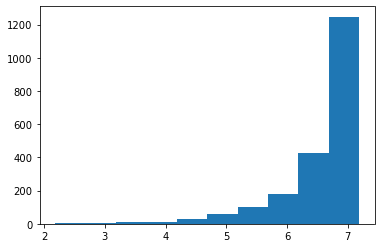

In [134]:
# df[~(df.gender == 'F') | (df.age > 40)]

plt.hist(tfidf.sort_values('tfidf'))


In [135]:
max_lim = 6
min_lim = 3

In [136]:
SW_tfidf = tfidf[(tfidf['tfidf']>max_lim)|(tfidf['tfidf']<min_lim)].reset_index()['index'].tolist()

In [137]:
russian_stopwords.extend(SW_tfidf)

In [138]:
%time
df['lemma_comment_2'] = df['lemma_comment'].map(lambda x: delete_stopwords(x))
df = df.drop(df[df['lemma_comment']==''].index)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 26.2 µs


In [139]:
df.head(5)

,comment,date_time,color,size,thumb_up,thumb_down,prod_eval,prod,brand,cleaned_comment,lemma_comment,lemma_comment_2
0,"Наушники суперские, качество звука суперское, ...",2021-05-04T14:37:48Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,наушники суперские качество звука суперское ба...,наушник суперский звук суперский бас качать ор...,качать подделка номер сайт пробиваться гарантия
1,Через год перестал работать правый микрофон и ...,2021-05-04T05:57:33Z,белый,0,1,0,2,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,через год перестал работать правый микрофон и ...,переставать правый микрофон отключаться левый ...,переставать правый микрофон левый щелчок
2,Одним словом: качество! Оригинальные,2021-05-03T10:39:27Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,одним словом качество оригинальные,оригинальный,
3,пишу отзыв спустя 9 месяцев. Наушники работают...,2021-05-03T03:54:20Z,белый,0,1,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,пишу отзыв спустя месяцев наушники работают от...,спустя месяц чистить ушной палочка спирт,спустя месяц палочка спирт
4,"Отлично, купила вторые для дочери.",2021-05-02T18:38:42Z,белый,0,2,0,5,Наушники Airpods (2-го поколения) с зарядным ф...,Apple,отлично купила вторые для дочери,дочь,дочь


In [140]:
df = df.reset_index(drop = True)

In [141]:
preprocessed_comments_2 = df['lemma_comment_2']

In [142]:
vectorizer2 = TfidfVectorizer(min_df=2, ngram_range=(1, 2))
vectorized_comments_2 = vectorizer2.fit_transform(preprocessed_comments_2)

In [143]:
#  creating a dictionary mapping the tokens to their tfidf values
tfidf2 = dict(zip(vectorizer2.get_feature_names(), vectorizer2.idf_))
tfidf2 = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf2), orient='index')
tfidf2.columns = ['tfidf']

In [144]:
#Эти слова показываем пользователю, он вводит то, по чему хочет почитать подробнее, или свое слово
tfidf2.sort_values(by=['tfidf'], ascending=True).head(5)

,tfidf
номер,3.289664
сайт,3.317063
упаковка,3.389037
поколение,3.499385
серийный,3.541944


In [145]:
nlp = spacy.load('ru_core_news_lg')

In [146]:
def top_10_similar2(word_for_checking, dataframe):
    critical_similarity_value = 0.44
    
    word_for_checking = nlp(word_for_checking)
    similarities = []
    for i in range(len(dataframe['lemma_comment_2'])):
        similarities.append(nlp(dataframe['lemma_comment_2'][i]).similarity(word_for_checking))
    
    df_temp = dataframe.copy()
    
    df_temp[f'similarity_to_{word_for_checking}'] = similarities
    #сортировка по убыванию similarities, фильтрация в соответствии с critical_similarity_value
    df_temp = df_temp.sort_values(by = f'similarity_to_{word_for_checking}', ascending = False).head(10)
    res = df_temp[df_temp[f'similarity_to_{word_for_checking}'] > critical_similarity_value][['comment', f'similarity_to_{word_for_checking}']]
    res = list(res['comment'])
    
    if len(res)>0:
        return res
    else: 
        return "По вашему запросу совпадений не найдено"

In [147]:
top_10_similar2('месяц', df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  import sys


['Использую несколько месяцев,очень довольна👍🏻наушники оригинал',
 'Наушниками пользую уже четыре месяца ,все работает ,очень довольна покупкой )',
 'Работаю уже 4 месяца, полет нормальный.',
 'Всё отлично ,взял две пары себе и дочке . Три месяца всё работает ',
 'Пользуюсь уже несколько месяцев, работают замечательно.',
 'Оригинальные airpods второго поколения, проверены на сайте apple, но гарантия не полгода, а три месяца, т.к. wildberries пепекупщик',
 'Прошло более 3х месяцев всё идеально. Спасибо',
 'Пишу спустя месяц использования. Работают отлично. При покупке проверили все номера - оригинал.',
 'Оригинал. Работают идеально. Хожу с ними уже месяц. Буду заказывать мужу.👍🏻',
 'Отличные наушники. Покупала их тут уже три раза (на подарки). У всех все работает отлично уже несколько месяцев.']